 <div class="alert alert-block alert-info">
<b>text</b> 
</div>

# **installing and importing libraries:**
------------------------------------------

## **japanize-matplotlib:**
- **to display games with japanize names when plotting**

In [99]:
pip install japanize-matplotlib

Note: you may need to restart the kernel to use updated packages.


## **imported librares:**

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import japanize_matplotlib
import seaborn as sns


> <div class="alert alert-block alert-info">
<b></b> 
</div>

# **importing & exploring games.csv:**
------------------------------------------

## **importing "games.csv"**

<br>

- **Imported it from kaggle**

In [101]:
df = pd.read_csv("/kaggle/input/steam-games-dataset/games.csv")
df.head(2)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


## **data shape**

In [102]:
df.shape

(72934, 39)

## **droping unwanted columns**
------------------------------------------

In [103]:
drops=["Screenshots","Movies","Developers","Publishers","Notes","Metacritic url",
       "Metacritic score","Support url","Header image","Full audio languages","About the game",
       "DLC count","AppID","Score rank","Reviews",'Peak CCU','Tags','Average playtime two weeks',
       'Median playtime forever','Median playtime two weeks']
len(drops)

20

In [104]:
games_data=df.drop(drops,axis=1)
games_data.head(3)

,Name,Release date,Estimated owners,Required age,Price,Supported languages,Website,Support email,Windows,Mac,Linux,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Categories,Genres
0,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,19.99,['English'],http://www.galacticbowling.net,NaN,True,False,False,0,6,11,30,0,0,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports"
1,Train Bandit,"Oct 12, 2017",0 - 20000,0,0.99,"['English', 'French', 'Italian', 'German', 'Sp...",http://trainbandit.com,support@rustymoyher.com,True,True,False,0,53,5,12,0,0,"Single-player,Steam Achievements,Full controll...","Action,Indie"
2,Jolt Project,"Nov 17, 2021",0 - 20000,0,4.99,"['English', 'Portuguese - Brazil']",NaN,ramoncampiaof31@gmail.com,True,False,False,0,0,0,0,0,0,Single-player,"Action,Adventure,Indie,Strategy"


### **available columns after dropping**
- 19 columns

In [105]:
games_data.columns

Index(['Name', 'Release date', 'Estimated owners', 'Required age', 'Price',
       'Supported languages', 'Website', 'Support email', 'Windows', 'Mac',
       'Linux', 'User score', 'Positive', 'Negative', 'Achievements',
       'Recommendations', 'Average playtime forever', 'Categories', 'Genres'],
      dtype='object')

## **exploring & cleaning null data**
------------------------------------------

In [106]:
games_data.isnull().sum()

Name                            2
Release date                    0
Estimated owners                0
Required age                    0
Price                           0
Supported languages             0
Website                     37493
Support email               11338
Windows                         0
Mac                             0
Linux                           0
User score                      0
Positive                        0
Negative                        0
Achievements                    0
Recommendations                 0
Average playtime forever        0
Categories                   3510
Genres                       2533
dtype: int64

### **droping two games without names**

In [107]:
games_data['Name'].dropna();

## **dived data into smaller datasets**
----

## user play time

In [108]:
game_time = games_data[["Name","Average playtime forever"]]
game_time.head(2)

,Name,Average playtime forever
0,Galactic Bowling,0
1,Train Bandit,0


## user recommendation and feedback

In [109]:
game_opinion= games_data[["Name","Recommendations","User score","Positive","Negative","Achievements"]]
game_opinion.head(2)

,Name,Recommendations,User score,Positive,Negative,Achievements
0,Galactic Bowling,0,0,6,11,30
1,Train Bandit,0,0,53,5,12


## **game information:**
- game price
- Estimated owners
- Required age
- Release date

In [110]:
game_info= games_data[['Name', 'Release date', 'Estimated owners', 'Required age','Price']]
game_info.head(2)

,Name,Release date,Estimated owners,Required age,Price
0,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,19.99
1,Train Bandit,"Oct 12, 2017",0 - 20000,0,0.99


### **changing 'Release date' column into just the release year**

In [111]:
games_data['Release date'] = pd.to_datetime(df['Release date']).dt.year
# gamees_data['Release date'] = gamees_data['Release date'].dt.year
game_info.update(games_data)

/tmp/ipykernel_33/2710106103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_info.update(games_data)
/tmp/ipykernel_33/2710106103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_info.update(games_data)
/tmp/ipykernel_33/2710106103.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [112]:
game_info.head()

,Name,Release date,Estimated owners,Required age,Price
0,Galactic Bowling,2008,0 - 20000,0,19.99
1,Train Bandit,2017,0 - 20000,0,0.99
2,Jolt Project,2021,0 - 20000,0,4.99
3,Henosis™,2020,0 - 20000,0,5.99
4,Two Weeks in Painland,2020,0 - 20000,0,0.00


### making 'Estimated owners' easer to use later

In [113]:
game_info[['Min Owners', 'Max Owners']] = game_info['Estimated owners'].str.split('-', expand=True)
game_info['Min Owners']= pd.to_numeric(game_info['Min Owners'])
game_info['Max Owners']= pd.to_numeric(game_info['Max Owners'])
game_info['Estimated owners']  =(game_info['Min Owners'] + game_info['Max Owners']) / 2 / 1000000

/tmp/ipykernel_33/129131047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_info[['Min Owners', 'Max Owners']] = game_info['Estimated owners'].str.split('-', expand=True)
/tmp/ipykernel_33/129131047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_info[['Min Owners', 'Max Owners']] = game_info['Estimated owners'].str.split('-', expand=True)
/tmp/ipykernel_33/129131047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

## game support info

In [114]:
game_support = games_data[['Name','Supported languages', 'Website', 'Support email', 'Windows','Mac', 'Linux']]
game_support.head(2)

,Name,Supported languages,Website,Support email,Windows,Mac,Linux
0,Galactic Bowling,['English'],http://www.galacticbowling.net,NaN,True,False,False
1,Train Bandit,"['English', 'French', 'Italian', 'German', 'Sp...",http://trainbandit.com,support@rustymoyher.com,True,True,False


### transforming "Website"&"Support email" into binary coulunms

In [115]:
game_support["Website"]=game_support["Website"].notnull().astype(int)
game_support["Support email"]=game_support["Support email"].notnull().astype(int)

/tmp/ipykernel_33/2988505936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_support["Website"]=game_support["Website"].notnull().astype(int)
/tmp/ipykernel_33/2988505936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_support["Support email"]=game_support["Support email"].notnull().astype(int)


## **game categories**

In [116]:
game_categories = games_data[['Name','Categories', 'Genres']]
game_categories.head(2)


,Name,Categories,Genres
0,Galactic Bowling,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports"
1,Train Bandit,"Single-player,Steam Achievements,Full controll...","Action,Indie"


In [117]:
#gamees_data['Genres'] = gamees_data['Genres'].str.split(',')
games_data = games_data.explode('Genres')
game_categories.update(games_data)


In [118]:
game_categories.head()

,Name,Categories,Genres
0,Galactic Bowling,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports"
1,Train Bandit,"Single-player,Steam Achievements,Full controll...","Action,Indie"
2,Jolt Project,Single-player,"Action,Adventure,Indie,Strategy"
3,Henosis™,"Single-player,Full controller support","Adventure,Casual,Indie"
4,Two Weeks in Painland,"Single-player,Steam Achievements","Adventure,Indie"


> <div class="alert alert-block alert-info">
<b></b> 
</div>

# **analyzing games:**
---
## based on :
- Distribution of Reviews
- release year
- genra
- catagory

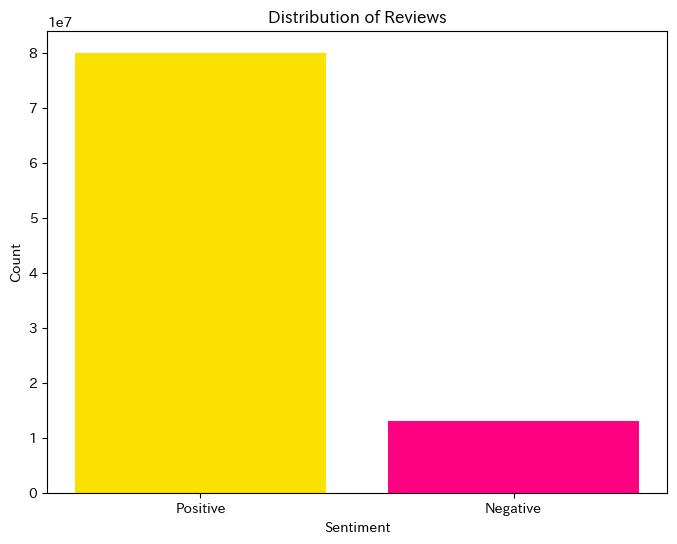

In [119]:
positive_counts = games_data['Positive'].sum()
colors = ['#272727','#FAE100', '#FF0181', '#900DFF',"#32DBF0"]
negative_counts =games_data['Negative'].sum()
# Plot the stacked bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Positive', 'Negative'], [positive_counts, negative_counts],color=colors[1:])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Reviews')
plt.show()

## release year plot:

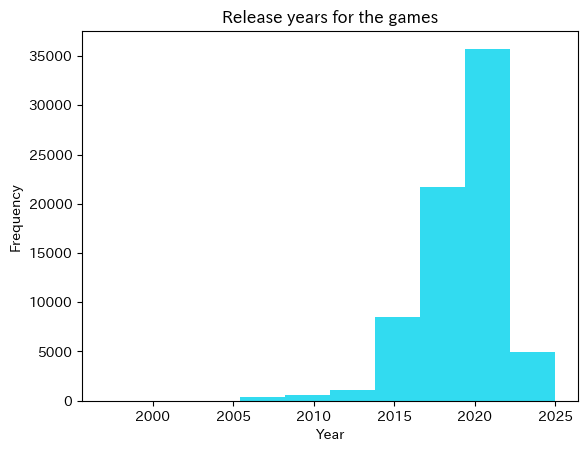

In [120]:

game_info["Release date"].plot.hist(color=colors[-1])
# plt.xticks(np.arange(min(game_info["Release date"]), max(game_info["Release date"]),3))
plt.xlabel("Year")
plt.title("Release years for the games")
plt.show()

## **Genres analysis**

In [121]:
genre_counts = game_categories['Genres'].value_counts()
genre_counts

Casual,Indie                                                                                                      4210
Action,Indie                                                                                                      3952
Action,Adventure,Indie                                                                                            3211
Adventure,Indie                                                                                                   2759
Action,Casual,Indie                                                                                               2243
                                                                                                                  ... 
Action,Adventure,Racing,RPG,Simulation,Sports                                                                        1
Action,Adventure,Massively Multiplayer,Strategy                                                                      1
Action,Adventure,Casual,Free to Play,Indie,Racin

In [122]:
all_g = []
genres =game_categories["Genres"].dropna().values
for g in genres:
    for word in g.split(",") :
        all_g.append(word)


genres_not_unique = pd.DataFrame(all_g , columns=["genres"])
genres_unique_counts = genres_not_unique.groupby(['genres'])['genres'].count()
genres_unique_counts = genres_unique_counts.sort_values(ascending=False)

In [123]:
genres_unique_counts.head(10)

genres
Indie           49568
Casual          29362
Action          29289
Adventure       27092
Simulation      13836
Strategy        13414
RPG             12296
Early Access     8536
Free to Play     5752
Sports           3234
Name: genres, dtype: int64

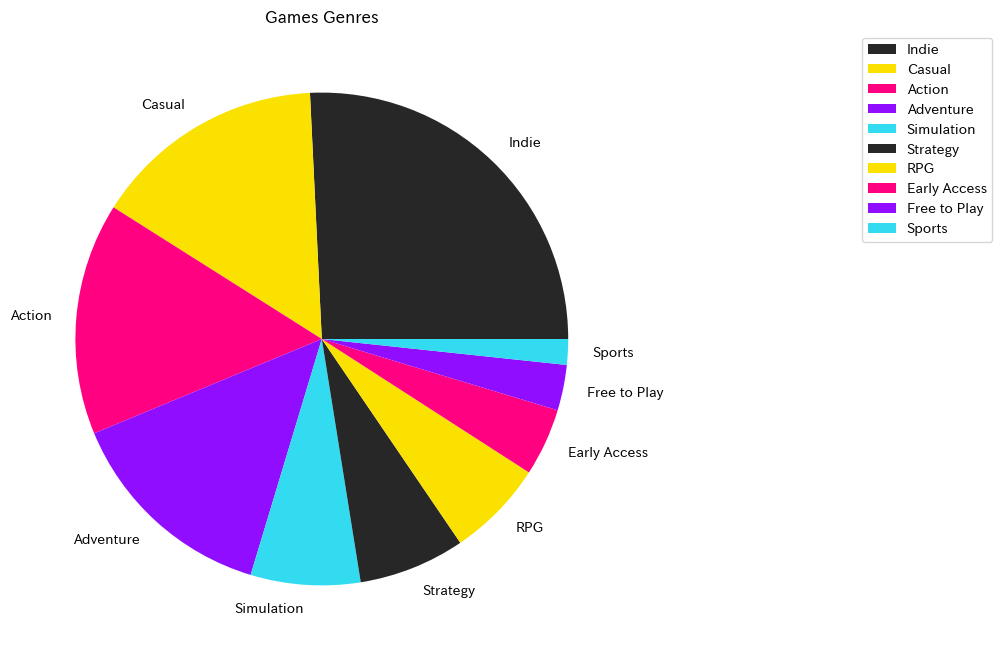

In [124]:
plt.figure(figsize = (15,8))

plt.pie(genres_unique_counts.head(10).values,labels  = genres_unique_counts.head(10).index,colors=colors)
plt.legend(bbox_to_anchor =(1, 0, 0.6, 1))
plt.title("Games Genres")
plt.show()


## **categories analysis:**

In [125]:
all_categories = []
catogeries =game_categories["Categories"].dropna().values
for c in catogeries:
    for cate in c.split(",") :
        all_categories.append(cate)


genres_not_unique = pd.DataFrame(all_categories , columns=["Categories"])
genres_unique_counts = genres_not_unique.groupby(['Categories'])['Categories'].count()
genres_unique_counts = genres_unique_counts.sort_values(ascending=False)

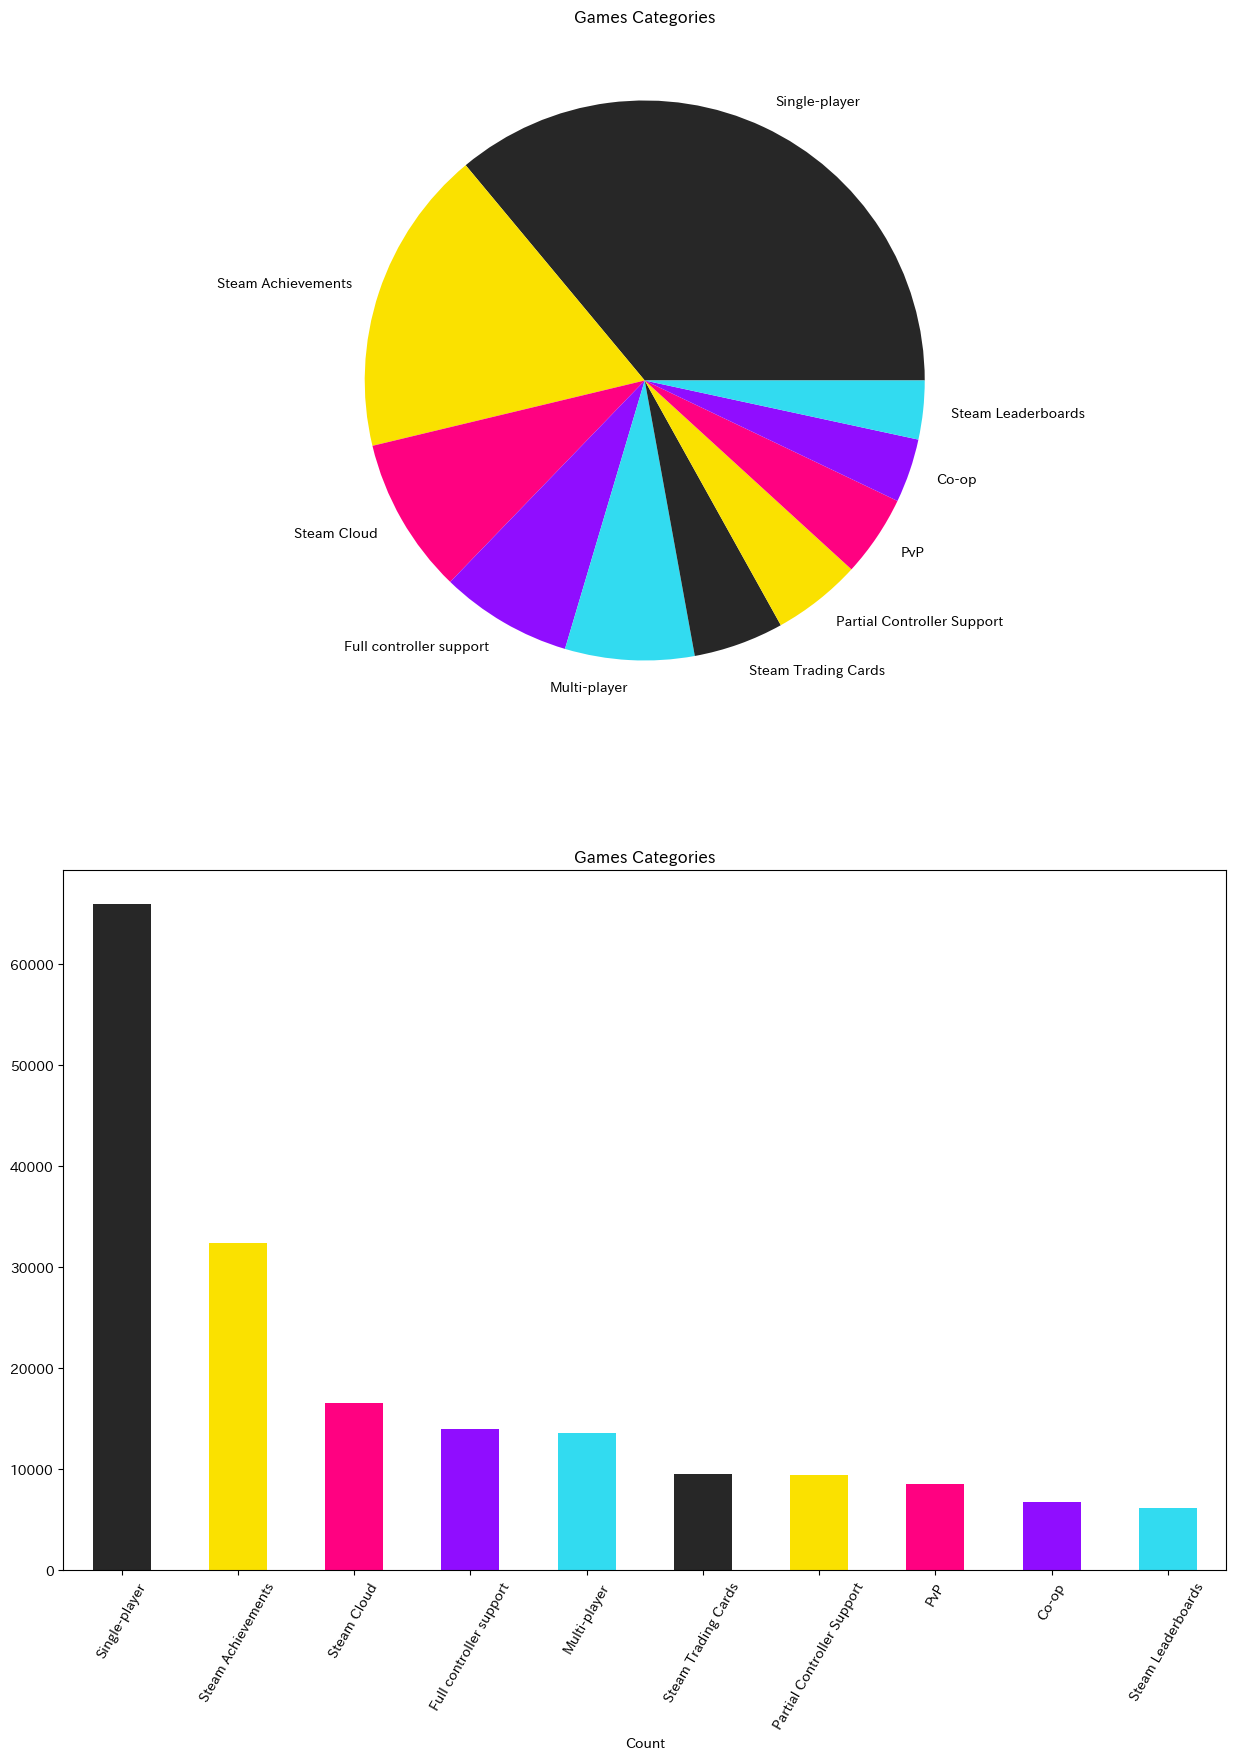

In [146]:
fig=plt.figure(figsize=(15,20))
plt.subplot(2,1,1)

plt.pie(genres_unique_counts.head(10).values,labels  = genres_unique_counts.head(10).index,colors=colors)

plt.title("Games Categories")
plt.subplot(2,1,2)
bar_plot = genres_unique_counts.head(10).plot.bar(color = colors)
plt.title("Games Categories")
plt.xlabel("Categories")
plt.xticks(rotation=60)
plt.show()

> <div class="alert alert-block alert-info">
<b></b> 
<br>
</div>

# **understanding what games support for user:**
- **if there a website or a support email for the game** 
- **operating system supported**
- **languges supported**



> <div class="alert alert-block alert-info">
<b></b> </div>

In [127]:
# langs =game_support["Supported languages"].dropna().map(lambda x: x.strip('][\'').split(', '))

all_languages = []
langs =game_support["Supported languages"].dropna().values

for g in langs:
    g=g.replace("[","")
    g=g.replace("]","")
    g=g.replace("'","")
    for word in g.split(",") :
        all_languages.append(word)
print(langs)
# all_languages
langs_not_unique = pd.DataFrame(all_languages , columns=["lang"])
langs_unique_counts = langs_not_unique.groupby(['lang'])['lang'].count().sort_values(ascending=False)

# langs_unique_counts.head(20)

["['English']"
 "['English', 'French', 'Italian', 'German', 'Spanish - Spain', 'Japanese', 'Portuguese - Brazil', 'Russian', 'Simplified Chinese', 'Traditional Chinese']"
 "['English', 'Portuguese - Brazil']" ... "['English']" "['Japanese']"
 "['English', 'Korean']"]


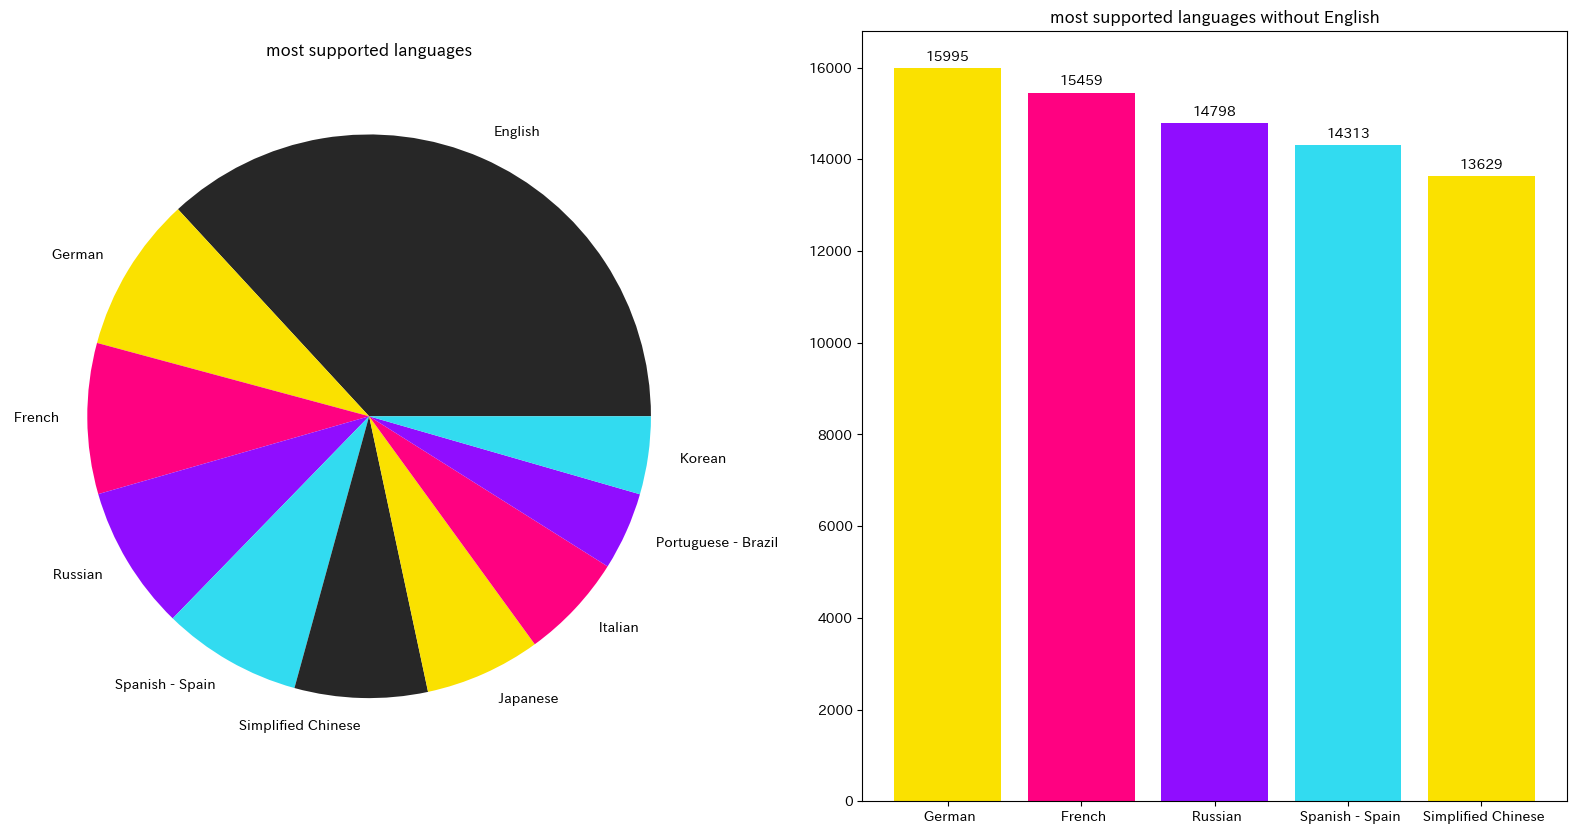

In [149]:
fig=plt.figure(figsize=(20,10))
plt.subplot(1,2,1)

plt.pie(langs_unique_counts.head(10).values,labels  = langs_unique_counts.head(10).index, colors=colors)
plt.title("most supported languages")
plt.subplot(1,2,2)

bar1=plt.bar(langs_unique_counts[1:6].index,langs_unique_counts[1:6].values,color=colors[1:])
plt.bar_label(bar1, labels=langs_unique_counts[1:6].values, padding=3, color='black') ;

plt.title("most supported languages without English")
plt.show()



In [129]:
game_support.head()

,Name,Supported languages,Website,Support email,Windows,Mac,Linux
0,Galactic Bowling,['English'],1,0,True,False,False
1,Train Bandit,"['English', 'French', 'Italian', 'German', 'Sp...",1,1,True,True,False
2,Jolt Project,"['English', 'Portuguese - Brazil']",0,1,True,False,False
3,Henosis™,"['English', 'French', 'Italian', 'German', 'Sp...",1,1,True,True,True
4,Two Weeks in Painland,"['English', 'Spanish - Spain']",1,1,True,True,False


games with support emails 61596
games with Website 35441


Support email    61596
Website          35441
dtype: int64

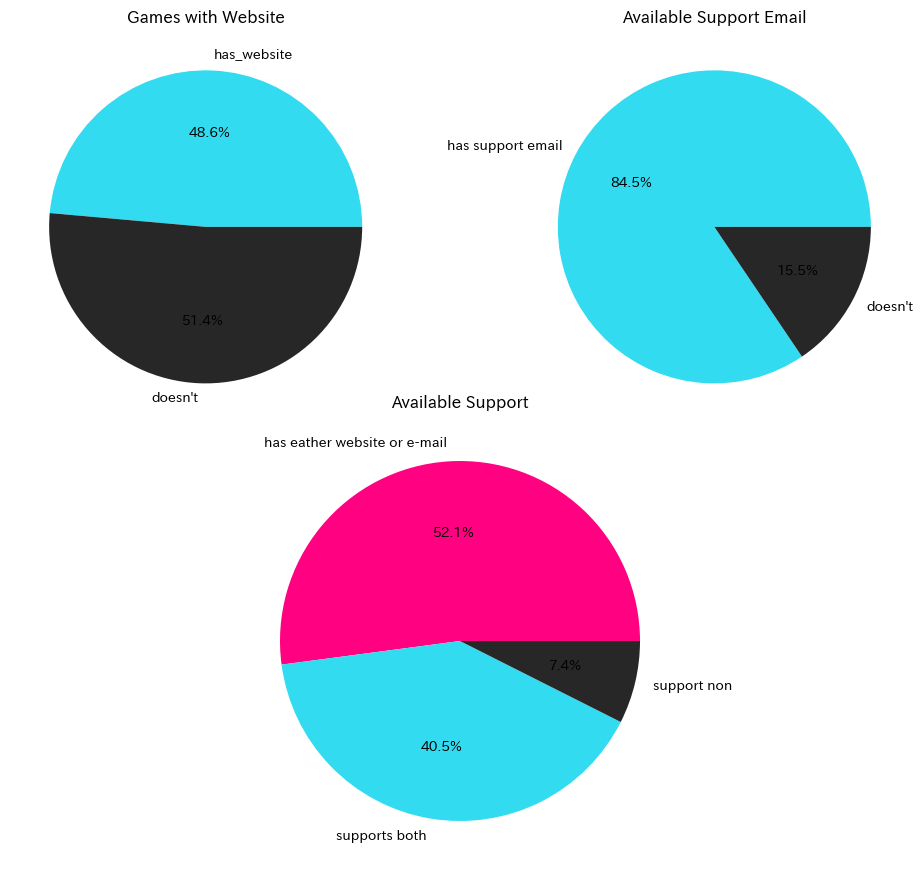

In [130]:
print("games with support emails", game_support["Support email"].sum())
print("games with Website", game_support["Website"].sum())
pie_colors = ['#900DFF', '#FF0181', '#FAE100', '#32DBF0', "#272727"]
supports_email = game_support["Support email"].sum()
has_website = game_support["Website"].sum()
game_support["counting_methods"]=game_support["Website"]+game_support["Support email"]
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Plot 1: games with website
axs[0, 0].pie([has_website, game_support["Website"].count() - has_website],
              labels=["has_website", "doesn't"], autopct='%1.1f%%', colors=pie_colors[3:])
axs[0, 0].set_title("Games with Website")

# Plot 2: available support email
axs[0, 1].pie([supports_email, game_support["Support email"].count() - supports_email],
              labels=["has support email", "doesn't"], autopct='%1.1f%%', colors=pie_colors[3:])
axs[0, 1].set_title("Available Support Email")

# Plot 3: available support
axs[1, 0].pie(game_support["counting_methods"]. value_counts(),
              labels=["has eather website or e-mail", "supports both","support non"], autopct='%1.1f%%', colors=[pie_colors[1],pie_colors[3],pie_colors[4]])
axs[1, 0].set_title("Available Support")

# Remove the empty subplot
axs[1, 1].remove()

plt.subplots_adjust(left=0.2, right=0.8, top=0.9, bottom=0.1, wspace=0.3, hspace=0.3)
axs[1, 0].set_position([0.3, 0.3, 0.4, 0.3])
game_support[["Support email", "Website"]].sum()


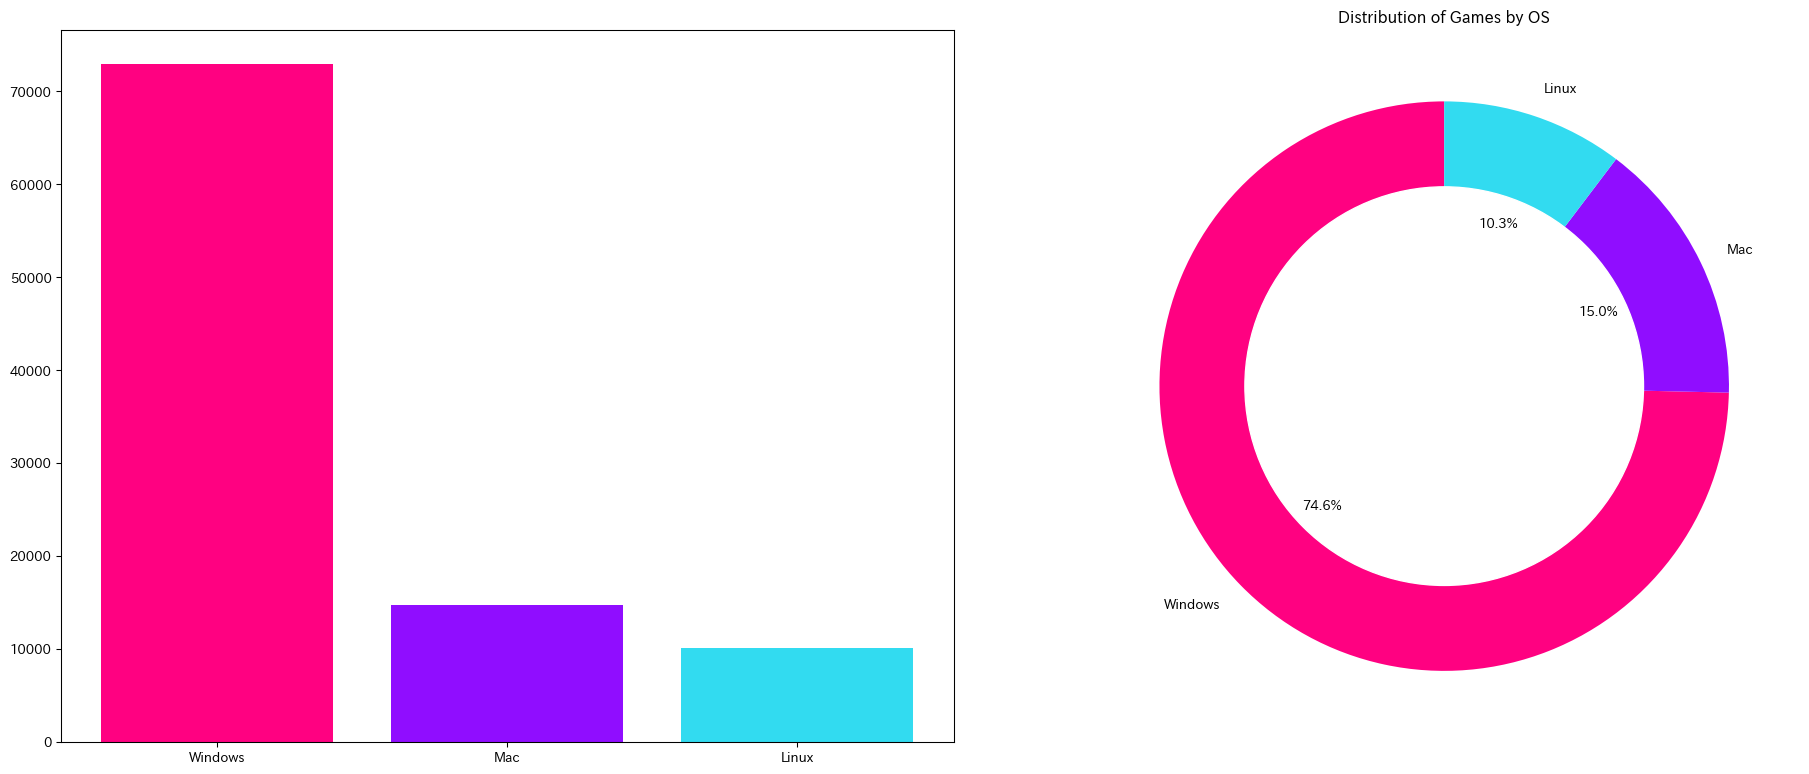

In [156]:
os_game_support=game_support[["Windows","Mac","Linux"]].sum()
vals=game_support[["Windows","Mac","Linux"]].sum().values
fig, ax = plt.subplots(1,2,figsize=(20,8), dpi = 96);

ax[0].bar(os_game_support.index,os_game_support.values,color=colors[2:]);
plt.bar_label(bar1, labels=vals, padding=3, color='black', fontsize=8) ;
plt.tight_layout()

os_counts = [games_data['Windows'].sum(), games_data['Mac'].sum(), games_data['Linux'].sum()]
ax[1].pie(os_counts, labels=['Windows', 'Mac', 'Linux'], autopct='%1.1f%%', startangle=90,colors=colors[2:]);
ax[1].set_title('Distribution of Games by OS')
ax[1].add_artist(plt.Circle((0, 0), 0.7, color='white'));


> <div class="alert alert-block alert-info">
<b></b> </div>

# **relationship between price and games props:**
- **Relationship between price and users count for the game** 
- **seeing Top 10 populated games**
- **Top 10 expensive games**
- **most played games**
- **relationshipbetween langueges supported and price**
- **Distribution of Reviews**
- **Price, User Score, and Achievements**

> <div class="alert alert-block alert-info">
<b></b> </div>

In [ ]:
game_info["Estimated owners"][game_info["Estimated owners"]<40]

0        0.01
1        0.01
2        0.01
3        0.01
4        0.01
         ... 
72929    0.00
72930    0.00
72931    0.00
72932    0.00
72933    0.00
Name: Estimated owners, Length: 72929, dtype: float64

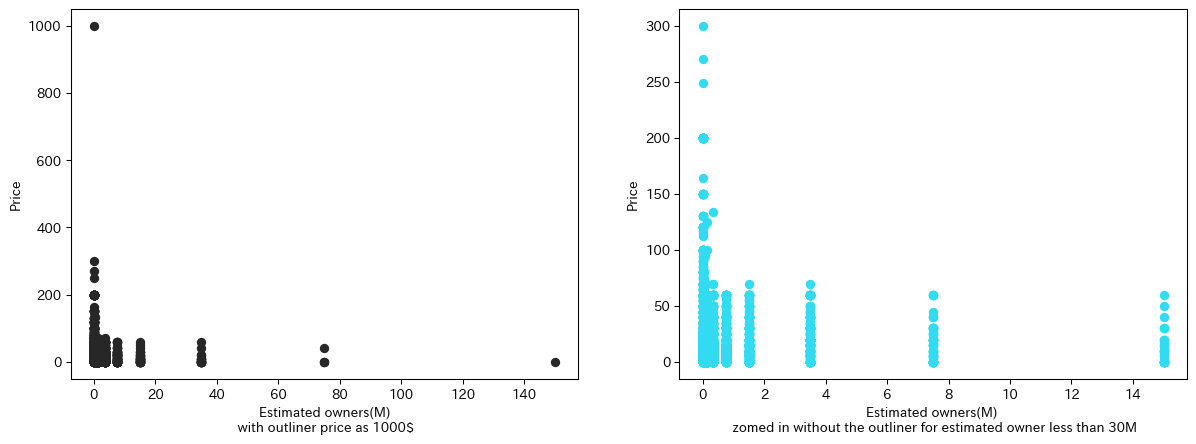

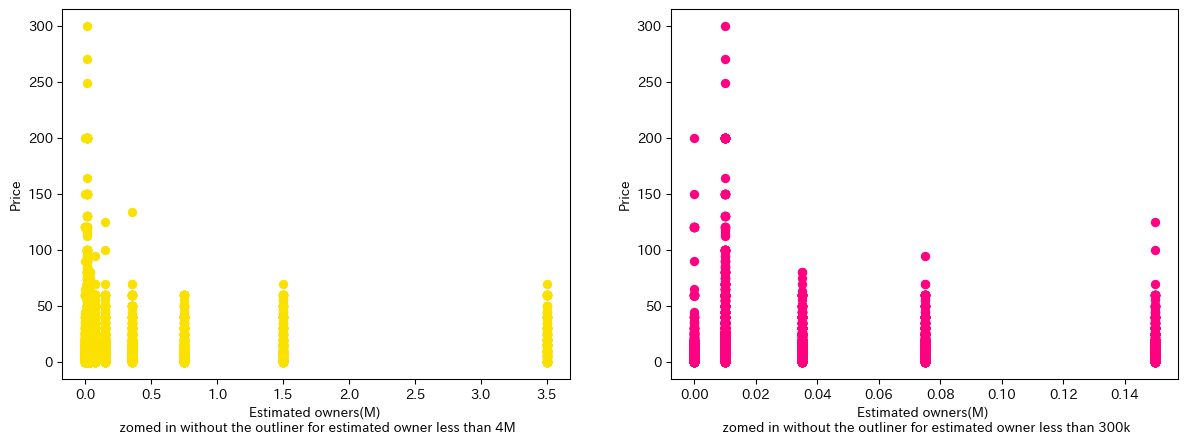

In [133]:
game_info= game_info.reset_index().set_index("Name")
game_info= game_info.sort_values("Estimated owners",ascending=False)
fig, ax = plt.subplots(1,2,figsize=(15,5), dpi = 96)
# colors = ['#272727','#FAE100', '#FF0181', '#900DFF',"#32DBF0"]
ax[0].scatter(game_info['Estimated owners'], game_info['Price'],color='#272727');
ax[0].set_xlabel('Estimated owners(M)\n with outliner price as 1000$')
ax[0].set_ylabel('Price');

ax[1].scatter(game_info['Estimated owners'].drop(game_info[(game_info["index"]==26936)|(game_info["Estimated owners"]>30)].index),
              game_info['Price'].drop(game_info[(game_info["index"]==26936)|(game_info["Estimated owners"]>30)].index),
              color="#32dbf0")
ax[1].set_xlabel('Estimated owners(M) \n zomed in without the outliner for estimated owner less than 30M')
ax[1].set_ylabel('Price');
fig, ax = plt.subplots(1,2,figsize=(15,5), dpi = 96)

ax[0].scatter(game_info['Estimated owners'].drop(game_info[(game_info["index"]==26936)|(game_info["Estimated owners"]>4)].index),
              game_info['Price'].drop(game_info[(game_info["index"]==26936)|(game_info["Estimated owners"]>4)].index),
              color="#FAE100")
ax[0].set_xlabel('Estimated owners(M) \n zomed in without the outliner for estimated owner less than 4M')
ax[0].set_ylabel('Price');

ax[1].scatter(game_info['Estimated owners'].drop(game_info[(game_info["index"]==26936)|(game_info["Estimated owners"]>0.3)].index),
              game_info['Price'].drop(game_info[(game_info["index"]==26936)|(game_info["Estimated owners"]>0.3)].index),
              color="#FF0181")
ax[1].set_xlabel('Estimated owners(M) \n zomed in without the outliner for estimated owner less than 300k')
ax[1].set_ylabel('Price');

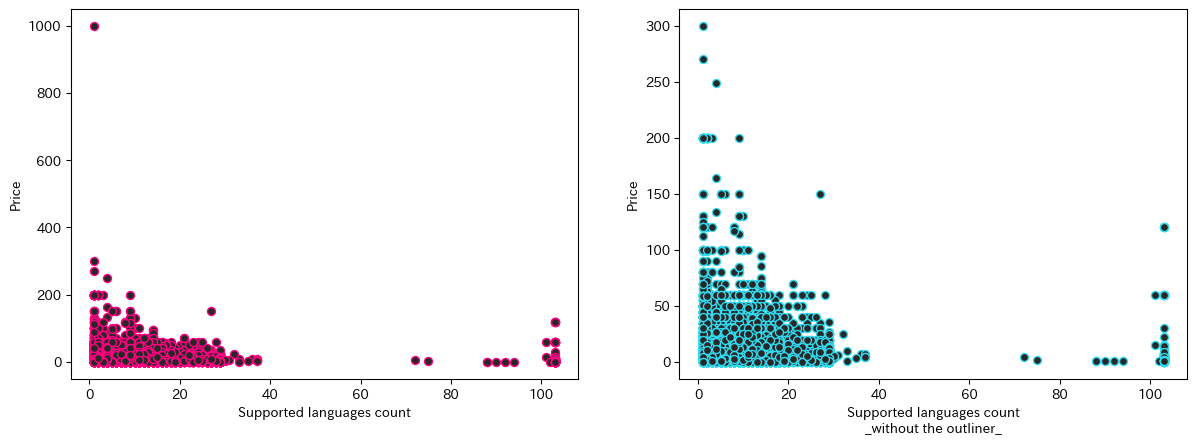

In [134]:
fig, ax = plt.subplots(1,2,figsize=(15,5), dpi = 96)

games_data['Supported languages count'] = games_data['Supported languages'].map(lambda x:x.strip('][').split(', ')).map(lambda i:len(i))
ax[0].scatter(games_data["Supported languages count"], games_data["Price"], color="#272727", edgecolor=colors[2]);
ax[0].set_xlabel('Supported languages count')
ax[0].set_ylabel('Price');

ax[1].scatter(games_data["Supported languages count"].drop(games_data["Price"].argmax()), games_data["Price"].drop(games_data["Price"].argmax()), color=colors[0], edgecolor=colors[4]);
ax[1].set_xlabel('Supported languages count\n_without the outliner_')
ax[1].set_ylabel('Price');

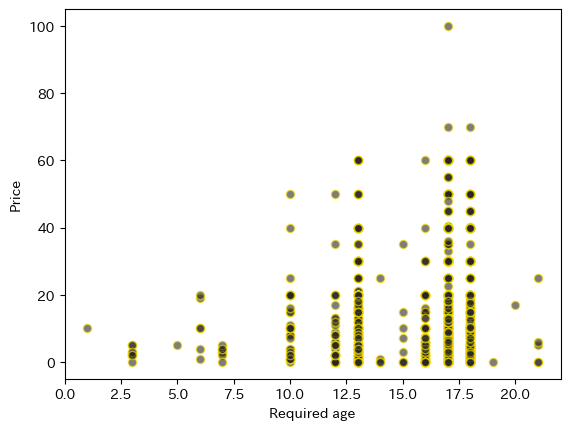

In [136]:
game_delete_zero_age = games_data.copy()
game_delete_zero_age.drop(game_delete_zero_age.loc[game_delete_zero_age['Required age']==0].index, inplace=True)
plt.scatter( game_delete_zero_age['Required age'], game_delete_zero_age["Price"], color=colors[0], edgecolor=colors[1],alpha = 0.6)
plt.xlabel('Required age')
plt.ylabel('Price');

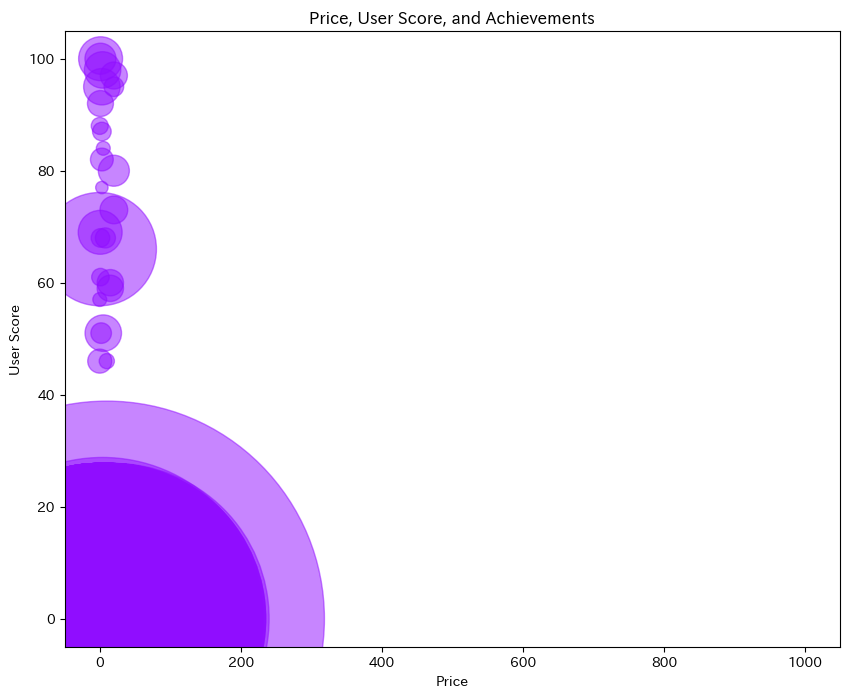

In [135]:
plt.figure(figsize=(10, 8))
plt.scatter(games_data['Price'], games_data['User score'], s=games_data['Achievements']*10, alpha=0.5,color=colors[3])
plt.xlabel('Price')
plt.ylabel('User Score')
plt.title('Price, User Score, and Achievements')
plt.show()

# **Top10 Games:**
---
- Top 10 populated games
- Top 10 expensive game
- Top 10 played games


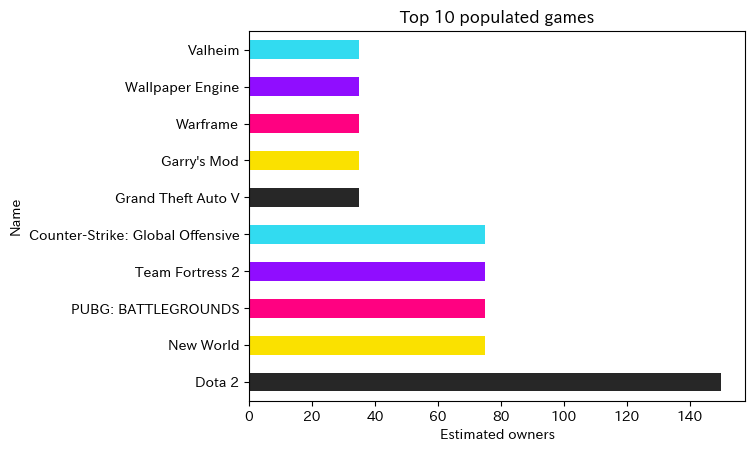

In [137]:
values= game_info[:10]["Estimated owners"]
colormap = plt.cm.tab10(range(0, len(values)))
plt.title("Top 10 populated games")
values.plot.barh(color=colors)
plt.xlabel("Estimated owners");

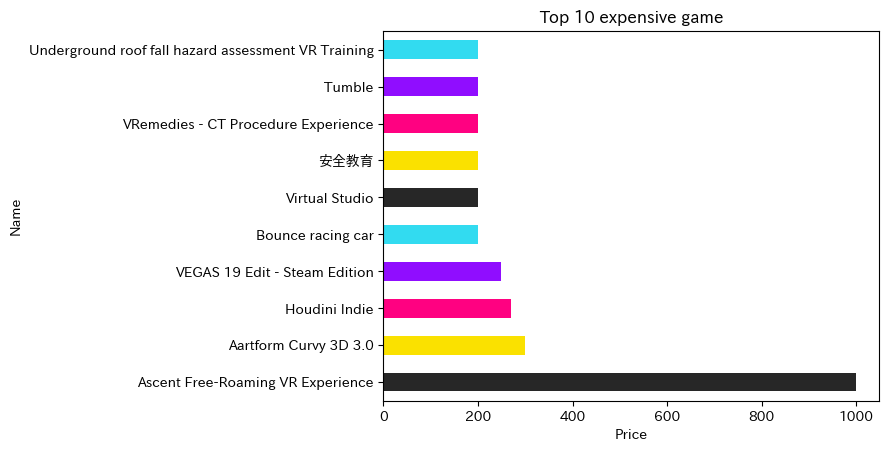

In [138]:

game_info= game_info.sort_values("Price",ascending=False);
values= game_info[:10]["Price"];
colormap = plt.cm.tab10(range(0, len(values)));
plt.title("Top 10 expensive game");
values.plot.barh(color=colors)
plt.xlabel("Price");

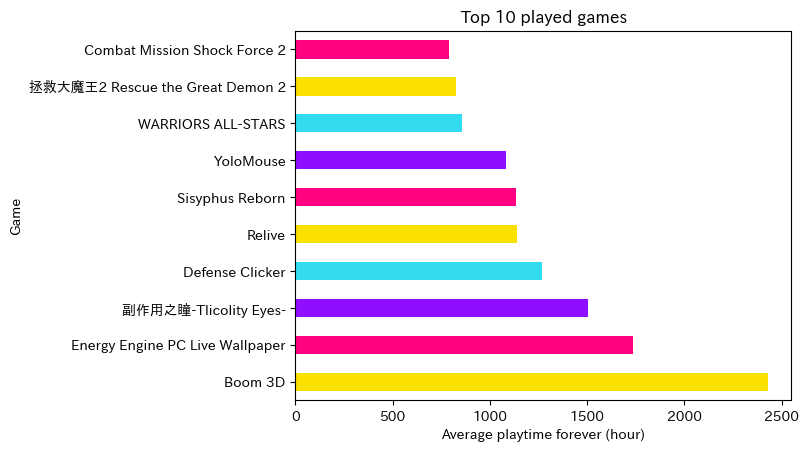

In [139]:
game_time= game_time.reset_index().set_index("Name")
game_time= game_time.sort_values("Average playtime forever",ascending=False);
values= game_time[:10]["Average playtime forever"] /60
colormap = plt.cm.tab10(range(0, len(values)));
plt.title("Top 10 played games");
values.plot.barh(color=colors[1:]);
plt.xlabel("Average playtime forever (hour)");
plt.ylabel("Game");
plt.show()

In [197]:
game_info= game_info.sort_values("Estimated owners",ascending=False);
values= game_info[:15]


,index,Release date,Estimated owners,Required age,Price,Min Owners,Max Owners
Name,,,,,,,
Dota 2,17585,2013,150.0,0,0.00,100000000,200000000
Team Fortress 2,30583,2007,75.0,0,0.00,50000000,100000000
New World,7030,2021,75.0,0,39.99,50000000,100000000
Counter-Strike: Global Offensive,46158,2012,75.0,0,0.00,50000000,100000000
PUBG: BATTLEGROUNDS,8885,2017,75.0,0,0.00,50000000,100000000
Half-Life 2: Lost Coast,57194,2005,35.0,0,0.00,20000000,50000000
Left 4 Dead 2,39530,2009,35.0,0,9.99,20000000,50000000
Tom Clancy's Rainbow Six® Siege,8256,2015,35.0,17,19.99,20000000,50000000
Wallpaper Engine,57459,2018,35.0,0,3.99,20000000,50000000


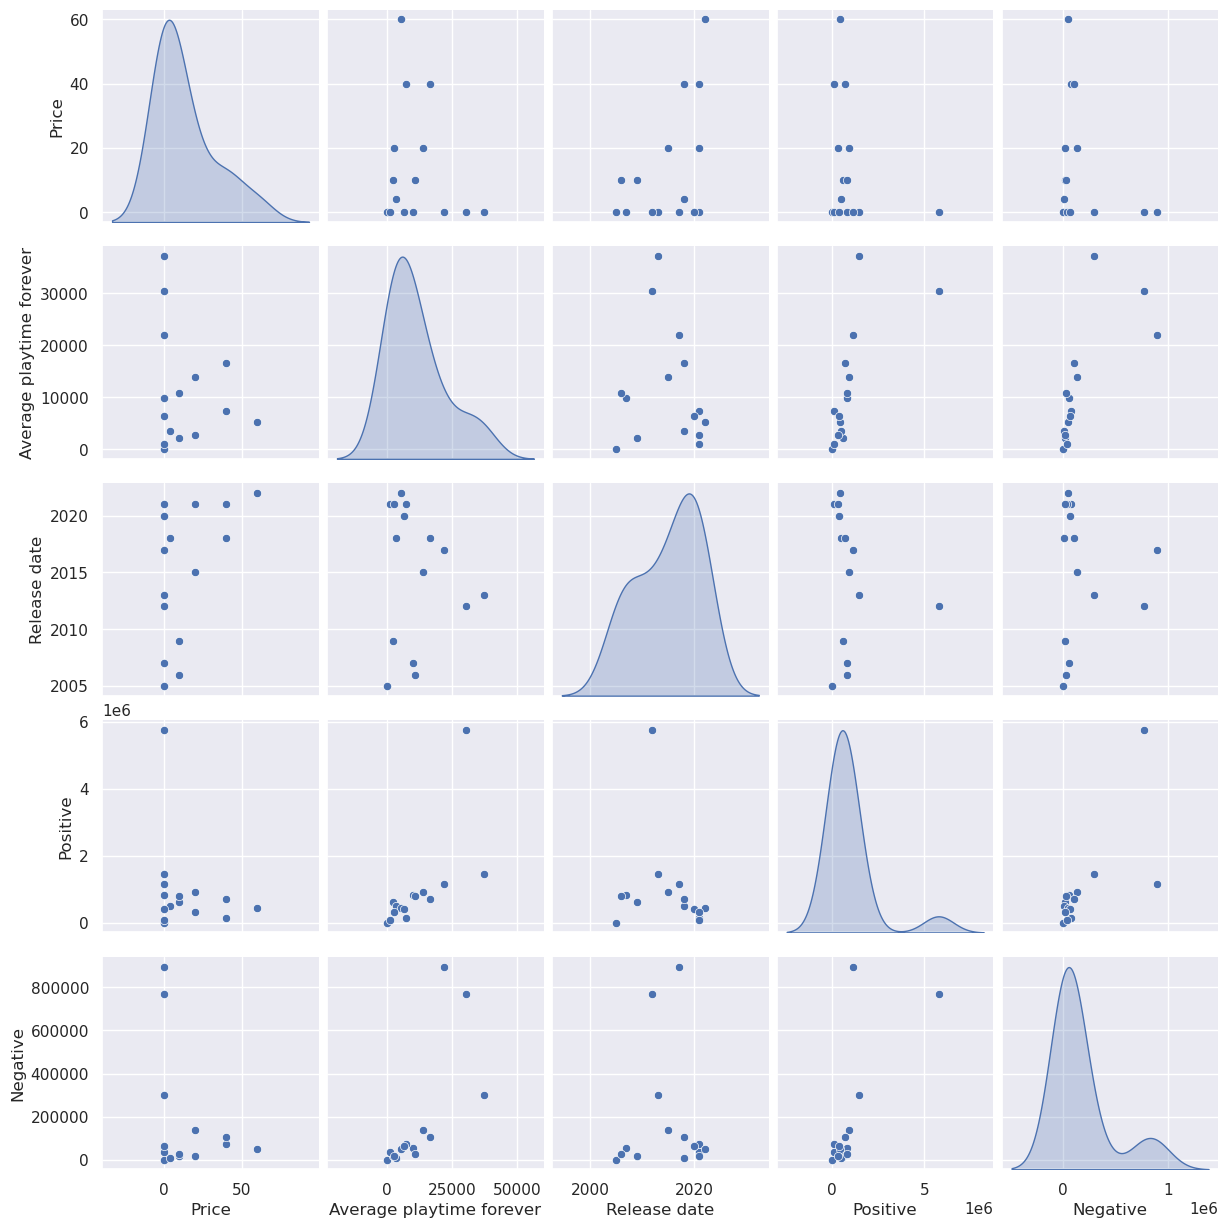

In [199]:

# sns.set(style="ticks", color_codes=True)
sns.set_style('darkgrid')
g = sns.pairplot(games_data.loc[values["index"],["Price","Average playtime forever","Release date",'Positive','Negative']], diag_kind='kde')
plt.show()


In [228]:
print(games_data.loc[values["index"],['Positive','100%']].sort_values(by="100%",ascending=False))

       Positive      100%
57459    522889  0.980557
39530    619457  0.974508
1289     822326  0.965931
33384    337177  0.954046
30583    823693  0.935615
32756    460812  0.899936
46158   5764420  0.882611
57194      9306  0.880666
8256     929372  0.870278
35001    703687  0.866706
736      415524  0.861847
17585   1477153  0.830986
52803    106133  0.735523
7030     154914  0.677030
8885    1154655  0.563072


In [ ]:
print(games_data.iloc[57459,:])

In [213]:
games_data["100%"]=games_data['Positive']/(games_data['Positive']+games_data['Negative'])

In [211]:
games_data["100%"].loc[values["index"]]

17585    0.830986
30583    0.935615
7030     0.677030
46158    0.882611
8885     0.563072
57194    0.880666
39530    0.974508
8256     0.870278
57459    0.980557
52803    0.735523
35001    0.866706
32756    0.899936
736      0.861847
1289     0.965931
33384    0.954046
Name: 100%, dtype: float64

In [215]:
games_data["100%"].sort_values(ascending=False)[:15]

33411    1.0
33090    1.0
33134    1.0
33118    1.0
33107    1.0
33102    1.0
33097    1.0
33093    1.0
33087    1.0
33160    1.0
33058    1.0
33053    1.0
33045    1.0
33044    1.0
33035    1.0
Name: 100%, dtype: float64

In [212]:
games_data.iloc[39530]

Name                                                             Left 4 Dead 2
Release date                                                              2009
Estimated owners                                           20000000 - 50000000
Required age                                                                 0
Price                                                                     9.99
Supported languages          ['Danish', 'Dutch', 'English', 'Finnish', 'Fre...
Website                                                     http://www.l4d.com
Support email                                                              NaN
Windows                                                                   True
Mac                                                                       True
Linux                                                                     True
User score                                                                   0
Positive                                            